<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_aic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（情報量基準AICによるモデル選択）

サイン関数の多項式回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

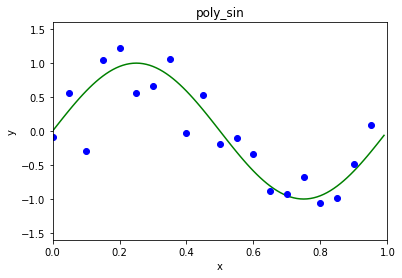

In [3]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

W
 [-0.01428008]


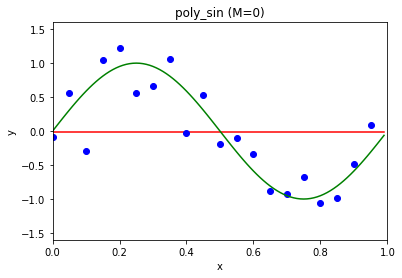

MSE= 0.48899129485352344
AIC= -12.308211832025124
W
 [ 0.7393375  -1.58656332]


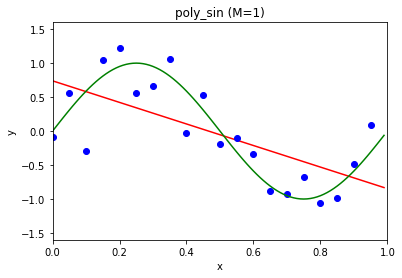

MSE= 0.27975044428730744
AIC= -21.477146872659624
W
 [ 0.59106832 -0.59810209 -1.0404855 ]


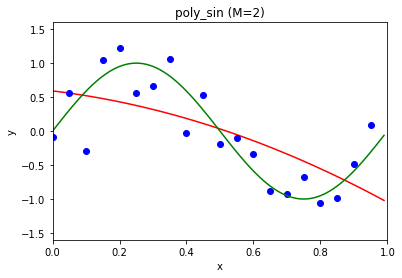

MSE= 0.2738109747423983
AIC= -19.9063456773802
W
 [ -0.22332586  11.22980362 -32.97751182  22.41194829]


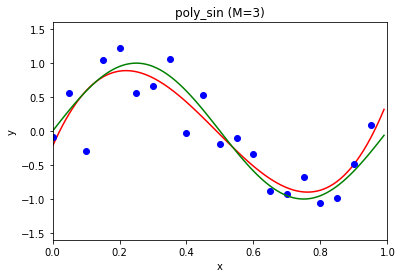

MSE= 0.10064360621432251
AIC= -37.92339307717532
W
 [ -0.07702165   7.22556277 -12.86508763 -11.05633344  17.61488513]


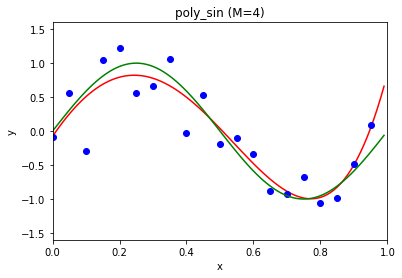

MSE= 0.09412346293766435
AIC= -37.26295846013899
W
 [ -0.0819004    7.46272728 -14.79027816  -5.4643231   10.91857022
   2.81950101]


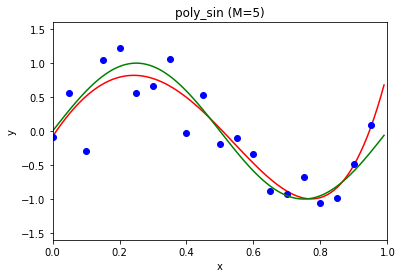

MSE= 0.09411357608374103
AIC= -35.26505939712436
W
 [-1.38113066e-02  1.64378025e+00  5.54699567e+01 -3.17205549e+02
  6.40045834e+02 -5.84615785e+02  2.06117644e+02]


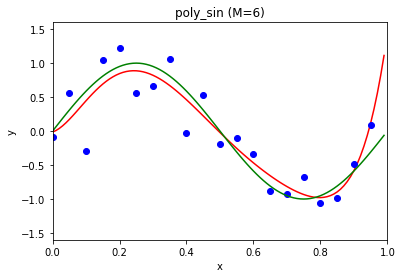

MSE= 0.09108741657790906
AIC= -33.91871223663618
W
 [ 3.30707831e-03 -9.98352812e-01  1.00195375e+02 -5.97241020e+02
  1.47694469e+03 -1.87235180e+03  1.19070454e+03 -2.96116359e+02]


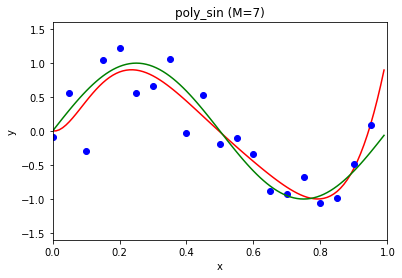

MSE= 0.09074311814330327
AIC= -31.994452836885976
W
 [-2.24220194e-03  6.45400998e-01  6.30727835e+01 -2.87142977e+02
  2.05102179e+02  9.68302247e+02 -2.33281535e+03  1.98370249e+03
 -5.99952348e+02]


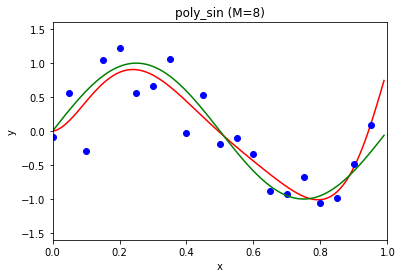

MSE= 0.09066862737966587
AIC= -30.01087752154114
W
 [-2.22368930e-02  1.31235817e+01 -2.95811188e+02  3.53696323e+03
 -2.02092699e+04  6.24361512e+04 -1.11456216e+05  1.15206286e+05
 -6.40764307e+04  1.48483062e+04]


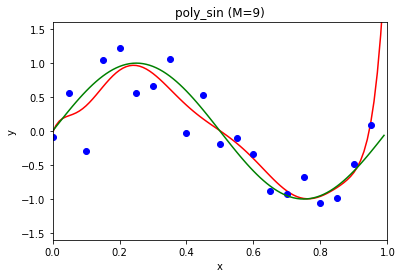

MSE= 0.08838724136717414
AIC= -28.520552963610413
AIC[9]=-28.520553


In [5]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]

AIC = np.zeros(len(search_range))

for M in search_range:

    W = E(x_train, y_train, M)
    print('W\n', W)

    y_estimate_aic = [y(x, W, M) for x in x_train]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train, y_train, 'bo')
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_train - y_estimate_aic)).mean()
    print('MSE=', mse)
    AIC[M] = N*np.log(mse) + 2*(M+1)
    print('AIC=', AIC[M])

print('AIC[%d]=%f'% (M, AIC[M]))



AIC
 [-12.30821183 -21.47714687 -19.90634568 -37.92339308 -37.26295846
 -35.2650594  -33.91871224 -31.99445284 -30.01087752 -28.52055296]
The best order of the model is 3


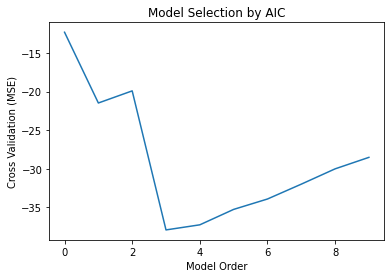

In [6]:
print('AIC\n', AIC)
print('The best order of the model is %d' % (np.argmin(AIC)))
                                                       
                                                       
plt.plot(AIC)
plt.title("Model Selection by AIC")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.savefig('poly_sin_AIC.eps')
plt.show()
plt.close()
